In [321]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

age = age in years <br>
sex = (1 = male; 0 = female) <br>
cp= chest pain type <br>
trestbps= resting blood pressure (in mm Hg on admission to the hospital) <br>
chol = serum cholestoral in mg/dl <br>
fbs = ( fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
restecg = resting electrocardiographic results <br>
thalach = maximum heart rate achieved <br>
exang = exercise induced angina (1 = yes; 0 = no) <br>
oldpeak = ST depression induced by exercise relative to rest <br>
slope = the slope of the peak exercise ST segment <br>
ca = number of major vessels (0-3) colored by flourosopy <br>
thal3 = normal; 6 = fixed defect; 7 = reversable defect <br>
target = 1 or 0 <br>

In [322]:
df = pd.read_csv('Heart Disease Dataset.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [324]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [325]:
def missing_values_table(df):
        miss = df.isnull().sum()
        percent = miss/len(df)*100
        miss_df = pd.concat([miss, percent], axis=1)
        miss_df = miss_df.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return miss_df

In [326]:
missing_values_table(df)

,Missing Values,% of Total Values
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


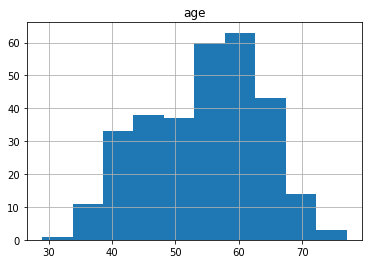

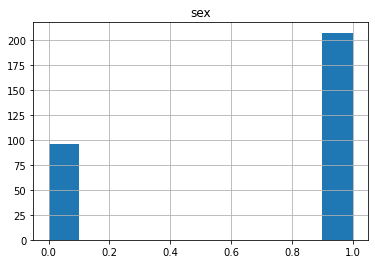

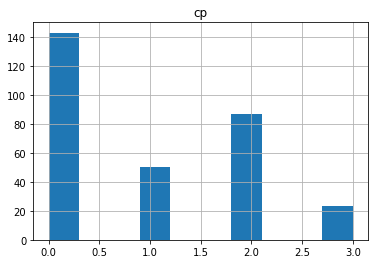

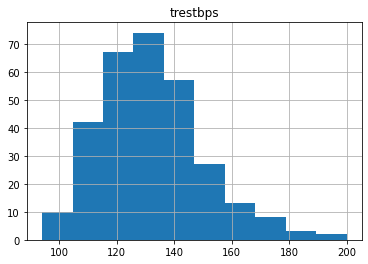

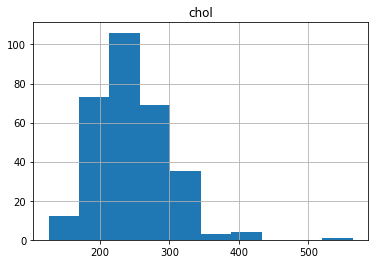

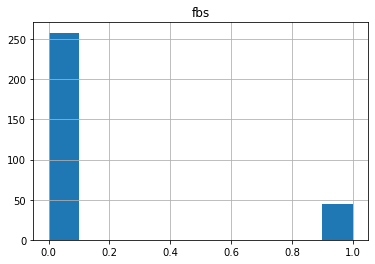

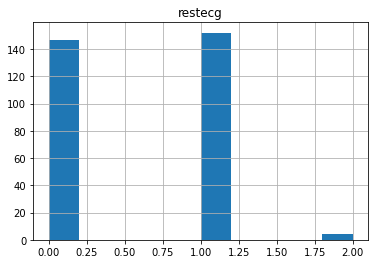

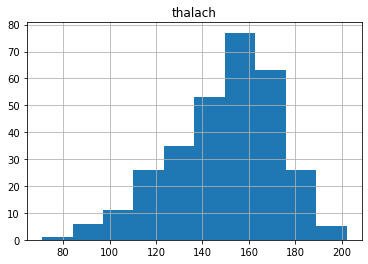

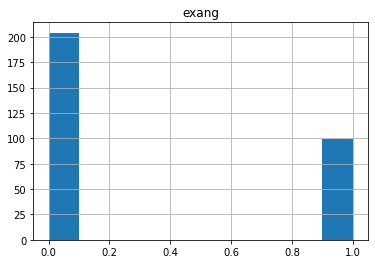

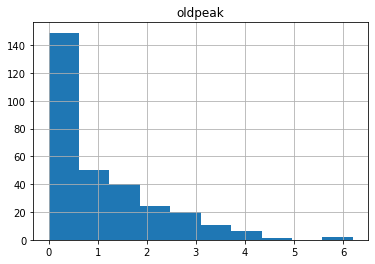

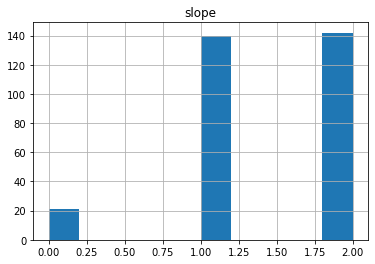

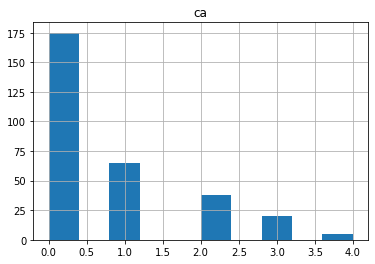

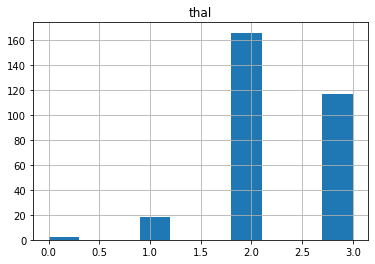

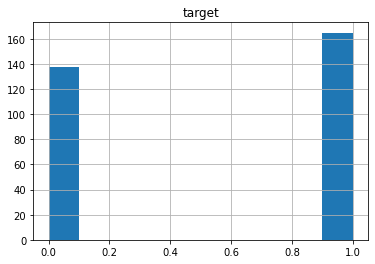

In [327]:
for  feature in (df.columns):
    df.hist(feature)   

In [328]:
def drop_outliners(df, df_q, features):
    outliners = []
    for feature in features:
        out_l = df[(df[feature]>df_q.iloc[1][feature]) | (df[feature]<df_q.iloc[0][feature])]
        outliners_count = len(out_l.index)
        if outliners_count < 2 and outliners_count > 0 :
            outliners.append(feature)
            print (out_l)
            df = df.drop(out_l.index)
    print('Outliners in: ', outliners)
    return df

In [329]:
df_q =  df.quantile([0.001, 0.999])
features = ['age', 'chol', 'thalach', 'oldpeak']
df = drop_outliners(df, df_q, features)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
204   62    0   0       160   164    0        0      145      0      6.2   

     slope  ca  thal  target  
204      0   3     3       0  
Outliners in:  ['oldpeak']


In [330]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.341060,0.685430,0.970199,131.529801,246.536424,0.149007,0.529801,149.662252,0.327815,1.022517,1.403974,0.721854,2.311258,0.546358
std,9.086493,0.465115,1.032257,17.490693,51.699075,0.356686,0.525849,22.941609,0.470196,1.124193,0.611939,1.015880,0.612011,0.498673
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


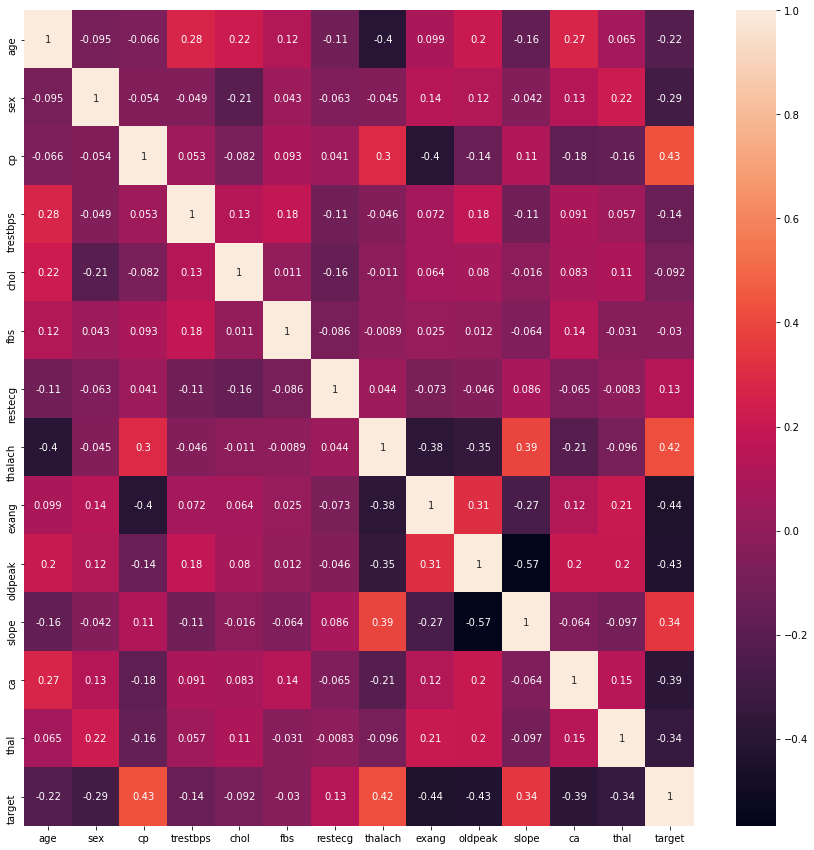

In [331]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

Масштабируем данные 

In [332]:
mms= MinMaxScaler()
features = ['age', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'cp', 'restecg']
df[features] = mms.fit_transform(df[features])

In [333]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,1.000000,145,0.244292,1,0.0,0.603053,0,0.410714,0.0,0.00,0.333333,1
1,0.166667,1,0.666667,130,0.283105,0,0.5,0.885496,0,0.625000,0.0,0.00,0.666667,1
2,0.250000,0,0.333333,130,0.178082,0,0.0,0.770992,0,0.250000,1.0,0.00,0.666667,1
3,0.562500,1,0.333333,120,0.251142,0,0.5,0.816794,0,0.142857,1.0,0.00,0.666667,1
4,0.583333,0,0.000000,120,0.520548,0,0.5,0.702290,1,0.107143,1.0,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0.000000,140,0.262557,0,0.5,0.396947,1,0.035714,0.5,0.00,1.000000,0
299,0.333333,1,1.000000,110,0.315068,0,0.5,0.465649,0,0.214286,0.5,0.00,1.000000,0
300,0.812500,1,0.000000,144,0.152968,1,0.5,0.534351,0,0.607143,0.5,0.50,1.000000,0
301,0.583333,1,0.000000,130,0.011416,0,0.5,0.335878,1,0.214286,0.5,0.25,1.000000,0


In [334]:
df_shuffled = shuffle(df, random_state=123)
train = df_shuffled[:int(len(df_shuffled)*0.8)]
test = df_shuffled[len(train):]

In [335]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
11,0.395833,0,0.666667,130,0.340183,0,0.5,0.519084,0,0.035714,1.0,0.00,0.666667,1
292,0.604167,0,0.000000,170,0.226027,1,0.0,0.572519,1,0.500000,0.5,0.50,0.333333,0
269,0.562500,1,0.000000,130,0.358447,1,0.0,0.244275,1,0.285714,0.0,0.00,1.000000,0
268,0.520833,1,0.000000,122,0.365297,0,0.0,0.343511,1,0.571429,0.5,0.50,0.666667,0
94,0.333333,0,0.333333,112,0.077626,0,0.5,0.511450,0,0.000000,0.5,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.708333,0,0.000000,150,0.641553,0,0.0,0.633588,0,0.714286,0.5,0.75,1.000000,0
249,0.833333,1,0.666667,140,0.292237,0,0.0,0.572519,0,0.357143,0.5,0.75,1.000000,0
48,0.500000,0,0.666667,128,0.205479,0,0.0,0.335878,0,0.000000,1.0,0.00,0.000000,1
234,0.854167,1,0.000000,130,0.447489,0,0.0,0.290076,0,0.428571,0.5,0.75,0.666667,0


In [336]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
172,0.604167,1,0.333333,120,0.360731,0,0.0,0.679389,0,0.321429,0.5,0.00,0.666667,0
51,0.770833,1,0.000000,120,0.401826,0,0.0,0.610687,0,0.071429,0.5,0.00,0.666667,1
1,0.166667,1,0.666667,130,0.283105,0,0.5,0.885496,0,0.625000,0.0,0.00,0.666667,1
210,0.583333,1,0.666667,128,0.235160,0,0.0,0.603053,0,0.071429,0.5,0.25,1.000000,0
18,0.291667,1,0.000000,150,0.276256,0,0.5,0.763359,0,0.267857,1.0,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.833333,1,1.000000,160,0.246575,1,0.0,0.458015,0,0.017857,0.5,0.25,0.666667,1
83,0.479167,1,1.000000,152,0.392694,1,0.5,0.816794,0,0.214286,0.5,0.00,1.000000,1
17,0.770833,0,1.000000,150,0.228311,0,0.5,0.328244,0,0.464286,0.0,0.00,0.666667,1
231,0.583333,1,0.000000,165,0.372146,1,0.0,0.404580,0,0.178571,0.5,0.75,1.000000,0


In [337]:
x_train = train.loc[:, train.columns != 'target'].to_numpy()
k_train = train['target'].to_numpy()
x_test = test.loc[:, test.columns != 'target'].to_numpy()
k_test = test['target'].to_numpy()

In [338]:
x, k

(array([[0.39583333, 0.        , 0.66666667, ..., 1.        , 0.        ,
         0.66666667],
        [0.60416667, 0.        , 0.        , ..., 0.5       , 0.5       ,
         0.33333333],
        [0.5625    , 1.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.5       , 0.        , 0.66666667, ..., 1.        , 0.        ,
         0.        ],
        [0.85416667, 1.        , 0.        , ..., 0.5       , 0.75      ,
         0.66666667],
        [0.5625    , 1.        , 1.        , ..., 0.5       , 0.        ,
         1.        ]]),
 array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0

### MLP CLASSIFIER

Функция активации: <br><br>
'identity' - f(x) = x <br>
'logistic' -  f(x) = 1 / (1 + exp(-x)) <br>
'tanh' -  f(x) = tanh(x) <br>
'relu' -  f(x) = max(0, x) <br>

In [382]:
def mlp_classifier (x_train, k_train, x_test, k_test, activation):
    mlp = MLPClassifier(hidden_layer_sizes=40, activation=activation, max_iter = 800)
    mlp.fit(x_train, k_train)

    k_pred = mlp.predict(x_test)
    k_prob = mlp.predict_proba(x_test)

    print('Train score: ', mlp.score(x_train, k_train))
    print('Test accuracy: ', mlp.score(x_test, k_test))
    
    return k_pred

In [383]:
for a in ['logistic', 'identity', 'tanh', 'relu']:
    print ('------- ', a, ' -------')
    mlp_classifier (x_train, k_train, x_test, k_test, a)
    print()

-------  logistic  -------
Train score:  0.8589211618257261
Test accuracy:  0.8688524590163934

-------  identity  -------
Train score:  0.8174273858921162
Test accuracy:  0.819672131147541

-------  tanh  -------
Train score:  0.8423236514522822
Test accuracy:  0.819672131147541

-------  relu  -------
Train score:  0.8423236514522822
Test accuracy:  0.8524590163934426

